## Descrição da base de dados

O dataset, intitulado "Data Science Job Salaries," contém informações sobre os salários de diferentes cargos na área de ciência de dados. Ele oferece uma visão abrangente de como as remunerações variam com base em diferentes fatores, como o nível de experiência, tipo de emprego, localização do empregado e da empresa, e a quantidade de trabalho remoto.

Sobre o Dataset

| Column |  Description |
|----------|----------|
| work_year | The year the salary was paid. |
| experience_level | The experience level in the job during the year with the following possible values: EN Entry-level / Junior MI Mid-level / Intermediate SE Senior-level / Expert EX Executive-level / Director |
| employment_type | The type of employement for the role: PT Part-time FT Full-time CT Contract FL Freelance |
| job_title | The role worked in during the year. |
| salary | The total gross salary amount paid. |
| salary_currency | The currency of the salary paid as an ISO 4217 currency code. |
| salary_in_usd | The salary in USD (FX rate divided by avg. USD rate for the respective year via fxdata.foorilla.com). |
| employee_residence | The year the salary was paid. |
| remote_ratio |  The overall amount of work done remotely, possible values are as follows: 0 No remote work (less than 20%) 50 Partially remote 100 Fully remote (more than 80%) |
| company_location | The country of the employer's main office or contracting branch as an ISO 3166 country code. |
| company_size |The average number of people that worked for the company during the year: S less than 50 employees (small) M 50 to 250 employees (medium) L more than 250 employees (large) |

___

## Perguntas para a análise exploratória:

**Salários**

*Distribuição salarial:*
- Qual a distribuição salarial média por nível de experiência?
- Como os salários variam por tipo de emprego (full-time, part-time, etc.)?
- Qual a relação entre salário e tamanho da empresa?
- Existe uma diferença significativa nos salários entre diferentes locais de trabalho?

*Desvios salariais:*
- Qual a amplitude salarial para cada cargo?
- Existem outliers salariais? Se sim, o que eles podem indicar?

*Impacto da moeda:*
- Como a conversão para dólares afeta a comparação de salários entre diferentes países?
- Existe uma correlação entre o salário em moeda local e o salário em dólares?

**Cargos e Experiência**

*Cargos mais comuns:*
- Quais são os cargos mais comuns no dataset?
- Como a demanda por diferentes cargos varia ao longo dos anos?

*Progressão de carreira:*
- Qual a relação entre o nível de experiência e o cargo?
- Existe uma progressão de carreira típica nesse dataset?

*Habilidades em alta:*
- Analisando os títulos dos cargos, quais habilidades são mais demandadas?

**Localização e Tamanho da empresa**

*Mercado de trabalho por região:*
- Quais regiões oferecem os salários mais altos?

*Tamanho x Salário*
- As grandes empresas pagam salários mais altos?
- Qual o tipo de cargo mais comum em empresas de cada tamanho?

___

Itens a verificar:

01. Dados vazios - OK
02. Retirar as colunas redundantes: salary e salary_currency - OK
03. Incluir 2 colunas: salário em real (anual) e salario em real (valor mensal). Valor da média da moeda USD no ano de referência. OK
04. Contagem de work_year
05. Contagem employeee_residence
06. Contagem company_location
07. Contagem company_size
08. Média salarial por employee_residence
09. Media salarial company_location
10. Contagem job_title - OK
11. Contagem experience_level - OK
12. Fazer uma analise de outliers para verificar quais cargos possuem maior e menor salários, porque alguns podem estar enquadrados nos outliers.

___

## Pré-Processamento dos dados

Instalação das bibliotecas

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Importação do Dataset

In [85]:
df = pd.read_csv("/content/ds_salaries.csv")
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [86]:
df.shape

(607, 12)

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


**Exclusão de colunas do Dataset**

Com o objetivo de reduzir a dimensionalidade do dataset e otimizar o tempo de processamento, as colunas 'Unnamed: 0', 'salary' e 'salary_currency' foram descartadas. A coluna 'Unnamed: 0' é um índice gerado automaticamente e não agrega valor à análise. As colunas 'salary' e 'salary_currency' foram removidas por possuirem informações redundantes e, portanto, desnecessárias para este estudo. Embora essa decisão tenha sido tomada para simplificar o exemplo, em datasets de grande porte, a exclusão de colunas irrelevantes é crucial para otimizar o processamento e a memória, evitando gargalos e aumentando a eficiência das análises.

In [88]:
df = df.drop(['Unnamed: 0', 'salary', 'salary_currency'], axis = 1)
df

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,150000,US,100,US,M


**Inclusão de novas colunas**

A fim de adaptar os dados à realidade brasileira, foram criadas as colunas 'salário_anual_brl' e 'salário_mensal_brl'. Os valores em dólares foram convertidos para reais utilizando as taxas de câmbio médias de cada ano. Essa conversão foi realizada em duas etapas: primeiro, o salário anual em dólares foi convertido para salário anual em reais e, em seguida, esse valor foi dividido por 12 para obter o salário mensal em reais. As análises subsequentes serão baseadas nesses valores convertidos.

In [89]:
exchange_rates = {2020: 5.16,
                  2021: 5.39,
                  2022: 5.17}
df['anual_salary_brl'] = df.apply(lambda row: row['salary_in_usd'] * exchange_rates[row['work_year']], axis=1)
df['monthly_salary_brl'] = df.apply(lambda row: row['anual_salary_brl'] / 12, axis=1).round(2)
df

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,anual_salary_brl,monthly_salary_brl
0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L,411938.28,34328.19
1,2020,SE,FT,Machine Learning Scientist,260000,JP,0,JP,S,1341600.00,111800.00
2,2020,SE,FT,Big Data Engineer,109024,GB,50,GB,M,562563.84,46880.32
3,2020,MI,FT,Product Data Analyst,20000,HN,0,HN,S,103200.00,8600.00
4,2020,SE,FT,Machine Learning Engineer,150000,US,50,US,L,774000.00,64500.00
...,...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,US,100,US,M,796180.00,66348.33
603,2022,SE,FT,Data Engineer,126000,US,100,US,M,651420.00,54285.00
604,2022,SE,FT,Data Analyst,129000,US,0,US,M,666930.00,55577.50
605,2022,SE,FT,Data Analyst,150000,US,100,US,M,775500.00,64625.00


Mudança das siglas das colunas "remote_ratio" e "experience_level" para uma que facilite o entendimento na análise dos gráficos

In [90]:
df.remote_ratio.replace([100,50,0], ['Remote', 'Hybrid' ,'On-site'],inplace = True)
df.experience_level.replace(['EN','MI','SE', 'EX'], ['Entry', 'Mid', 'Senior', 'Executive'], inplace = True)

In [91]:
df.employment_type.unique()

array(['FT', 'CT', 'PT', 'FL'], dtype=object)

In [92]:
df.employment_type.replace(['FT','CT','PT', 'FL'], ['Full-time', 'Contract', 'Part-time', 'Freelance'], inplace = True)

In [93]:
df.company_size.replace(['S','M','L'], ['Small', 'Medium', 'Large'], inplace = True)

In [94]:
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,anual_salary_brl,monthly_salary_brl
0,2020,Mid,Full-time,Data Scientist,79833,DE,On-site,DE,Large,411938.28,34328.19
1,2020,Senior,Full-time,Machine Learning Scientist,260000,JP,On-site,JP,Small,1341600.00,111800.00
2,2020,Senior,Full-time,Big Data Engineer,109024,GB,Hybrid,GB,Medium,562563.84,46880.32
3,2020,Mid,Full-time,Product Data Analyst,20000,HN,On-site,HN,Small,103200.00,8600.00
4,2020,Senior,Full-time,Machine Learning Engineer,150000,US,Hybrid,US,Large,774000.00,64500.00


In [95]:
# informações do dataframe atualizado
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   work_year           607 non-null    int64  
 1   experience_level    607 non-null    object 
 2   employment_type     607 non-null    object 
 3   job_title           607 non-null    object 
 4   salary_in_usd       607 non-null    int64  
 5   employee_residence  607 non-null    object 
 6   remote_ratio        607 non-null    object 
 7   company_location    607 non-null    object 
 8   company_size        607 non-null    object 
 9   anual_salary_brl    607 non-null    float64
 10  monthly_salary_brl  607 non-null    float64
dtypes: float64(2), int64(2), object(7)
memory usage: 52.3+ KB


In [96]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
work_year,607.0,2021.405272,0.692133,2020.00,2021.000,2022.00,2022.00,2022.0
salary_in_usd,607.0,112297.869852,70957.259411,2859.00,62726.000,101570.00,150000.00,600000.0
anual_salary_brl,607.0,588319.747759,372753.046448,15410.01,333899.720,539000.00,782634.60,3234000.0
monthly_salary_brl,607.0,49026.645552,31062.753895,1284.17,27824.975,44916.67,65219.55,269500.0


### EDA

### Analise dos principais títulos dos cargos

Quais são os cargos com mais profissionais na área de dados?

In [100]:
df['job_title'].value_counts()

,count
job_title,
Data Scientist,143
Data Engineer,132
Data Analyst,97
Machine Learning Engineer,41
Research Scientist,16
Data Science Manager,12
Data Architect,11
Big Data Engineer,8
Machine Learning Scientist,8


In [101]:
df['job_title'].unique()

array(['Data Scientist', 'Machine Learning Scientist',
       'Big Data Engineer', 'Product Data Analyst',
       'Machine Learning Engineer', 'Data Analyst', 'Lead Data Scientist',
       'Business Data Analyst', 'Lead Data Engineer', 'Lead Data Analyst',
       'Data Engineer', 'Data Science Consultant', 'BI Data Analyst',
       'Director of Data Science', 'Research Scientist',
       'Machine Learning Manager', 'Data Engineering Manager',
       'Machine Learning Infrastructure Engineer', 'ML Engineer',
       'AI Scientist', 'Computer Vision Engineer',
       'Principal Data Scientist', 'Data Science Manager', 'Head of Data',
       '3D Computer Vision Researcher', 'Data Analytics Engineer',
       'Applied Data Scientist', 'Marketing Data Analyst',
       'Cloud Data Engineer', 'Financial Data Analyst',
       'Computer Vision Software Engineer',
       'Director of Data Engineering', 'Data Science Engineer',
       'Principal Data Engineer', 'Machine Learning Developer',
       

Quantos cargos diferentes temos na base toda?

In [102]:
df['job_title'].nunique()

50

In [103]:
jobs = df.groupby('job_title').size().reset_index().sort_values(by=0,ascending = False)
jobs

,job_title,0
22,Data Scientist,143
17,Data Engineer,132
12,Data Analyst,97
38,Machine Learning Engineer,41
48,Research Scientist,16
21,Data Science Manager,12
16,Data Architect,11
7,Big Data Engineer,8
41,Machine Learning Scientist,8
25,Director of Data Science,7


<ipython-input-104-d79979f08c84>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='job_title',y=0,data = jobs[:10],palette = 'deep')


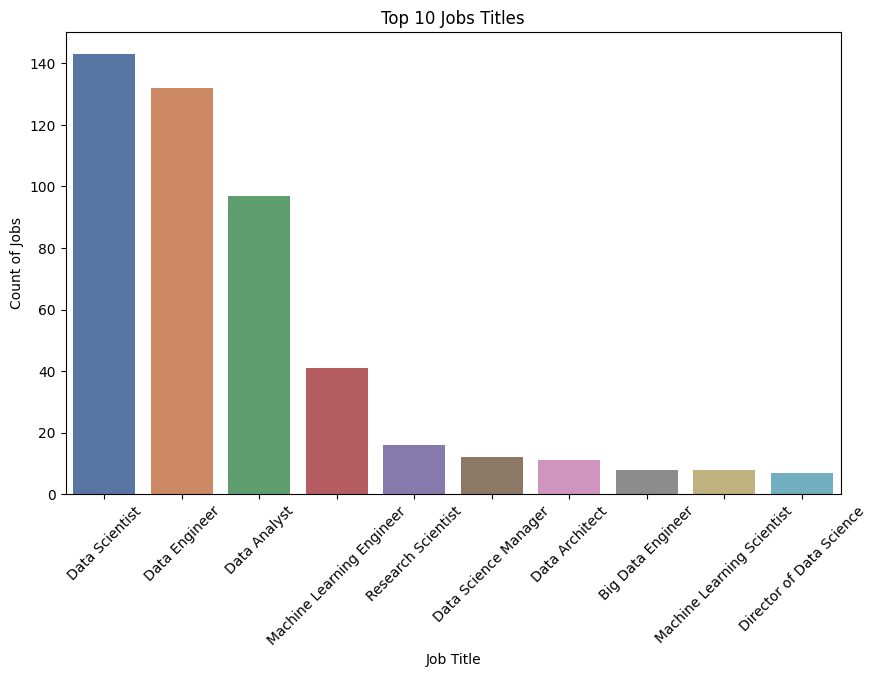

In [104]:
plt.figure(figsize=(10, 6))
sns.barplot(x='job_title',y=0,data = jobs[:10],palette = 'deep')
plt.title('Top 10 Jobs Titles')
plt.xlabel('Job Title')
plt.ylabel('Count of Jobs')
plt.xticks(rotation=45)
plt.show()

<br>
Inicialmente foi realizada uma análise com todos os títulos dos cargos listados no dataset e foi constatado que alguns dos cargos se repetiam (como Machine Learning Engineer e ML Engineer), ou eram muito similares entre si (Director of Data Science, Data Science Manager, Pricipal Data Science, etc.)

Assim, se fez necessário um tratamento dos dados com a finalidade de diminuir esse número de cargos visando facilitar as análises futuras.

Para isto, os cargos foram divididos em quatro grupos: ***Data Science, Data Analyst, Data Engineer e Machine Learn Scientist***, aos quais foram adicionandos os cargos do dataset original.

**Observações:**
É importante destacar que nenhum cargo figurou em mais de um grupo. Para decidir em qual grupo determinado cargo deveria ser adicionado, foi realizada uma pesquisa no google como forma de entender as atribuições de cada cargo, além do uso do chat-gpt para auxiliar nesta divisão. Os cargos muito generalista foram adicionados ao grupo chamado ***Outros (Others)***.

<br>
Unindos os cagos nos grupos: data science, data analyst, data engineer, machine learn scientist e outros...


In [105]:
data_science_list = ['Lead Data Scientist',
                     'Data Science Consultant',
                     'Director of Data Science',
                     'Principal Data Scientist',
                     'Data Science Manager',
                     'Applied Data Scientist',
                     'Data Science Engineer',
                     'Head of Data Science',
                     'Staff Data Scientist',
]

data_analyst_list = ['Product Data Analyst',
                     'Business Data Analyst',
                     'Lead Data Analyst',
                     'BI Data Analyst',
                     'Data Analytics Engineer',
                     'Financial Data Analyst',
                     'Data Analytics Manager',
                     'Finance Data Analyst',
                     'Principal Data Analyst',
                     'Data Analytics Lead',
                     'Marketing Data Analyst'
]

machine_learning_list = ['Machine Learning Engineer',
                         'Machine Learning Manager',
                         'Machine Learning Infrastructure Engineer',
                         'ML Engineer',
                         'Machine Learning Developer',
                         'Applied Machine Learning Scientist',
                         'Lead Machine Learning Engineer',
                         'Head of Machine Learning',
                         'Computer Vision Engineer',
                         'Computer Vision Software Engineer',
                         '3D Computer Vision Researcher',
                         'NLP Engineer',
                         'AI Scientist',
]

data_engineer_list = ['Data Architect',
                      'Lead Data Engineer',
                      'Data Engineering Manager',
                      'Analytics Engineer',
                      'Principal Data Engineer',
                      'Cloud Data Engineer',
                      'Director of Data Engineering',
                      'Big Data Engineer',
                      'Big Data Architect',
                      'ETL Developer'
]

others_list = ['Research Scientist',
               'Head of Data',
               'Data Specialist'
]

modified_df = df.replace(data_science_list, 'Data Scientist').replace(data_analyst_list, 'Data Analyst').replace(machine_learning_list, 'Machine Learning Scientist').replace(data_engineer_list, 'Data Engineer').replace(others_list, 'Others')

In [106]:
# dataframe modificado para agrupar todos os cargos em grupos menores
modified_df['job_title'].value_counts()

,count
job_title,
Data Scientist,192
Data Engineer,176
Data Analyst,131
Machine Learning Scientist,86
Others,22


In [107]:
modified_jobs = modified_df.groupby('job_title').size().reset_index().sort_values(by=0,ascending = False)
modified_jobs

,job_title,0
2,Data Scientist,192
1,Data Engineer,176
0,Data Analyst,131
3,Machine Learning Scientist,86
4,Others,22


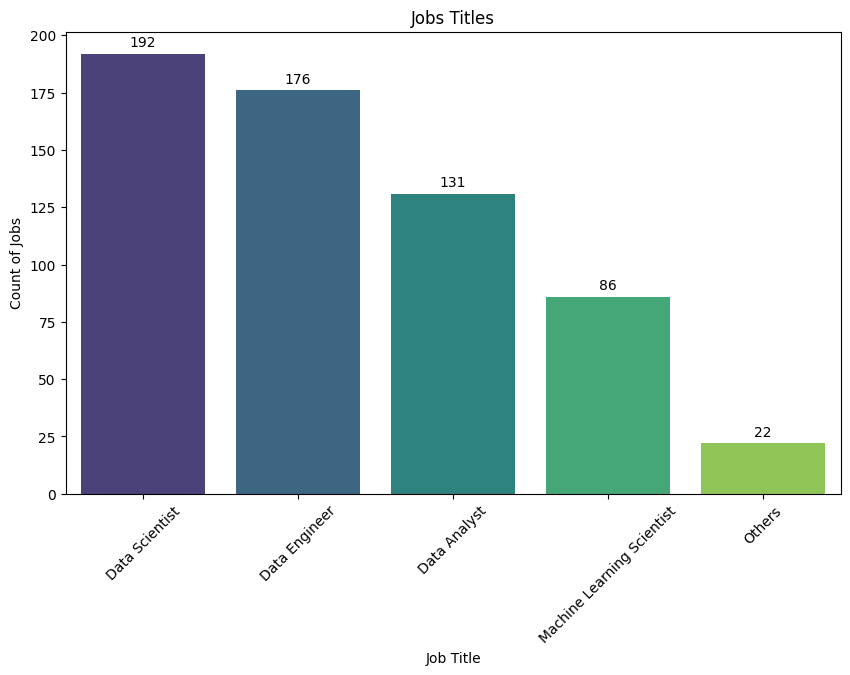

In [108]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='job_title', y=0, data = modified_jobs, palette = 'viridis', hue='job_title', legend=False)

plt.title('Jobs Titles')
plt.xlabel('Job Title')
plt.ylabel('Count of Jobs')
plt.xticks(rotation=45)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom',
                xytext=(0, 3),  # desloca o texto 5 pontos para cima
                textcoords='offset points')

plt.show()

ANALISANDO Número de cargos WORK YEAR

In [109]:
modified_df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,anual_salary_brl,monthly_salary_brl
0,2020,Mid,Full-time,Data Scientist,79833,DE,On-site,DE,Large,411938.28,34328.19
1,2020,Senior,Full-time,Machine Learning Scientist,260000,JP,On-site,JP,Small,1341600.00,111800.00
2,2020,Senior,Full-time,Data Engineer,109024,GB,Hybrid,GB,Medium,562563.84,46880.32
3,2020,Mid,Full-time,Data Analyst,20000,HN,On-site,HN,Small,103200.00,8600.00
4,2020,Senior,Full-time,Machine Learning Scientist,150000,US,Hybrid,US,Large,774000.00,64500.00


In [110]:
modified_df['work_year'].value_counts()

,count
work_year,
2022,318
2021,217
2020,72


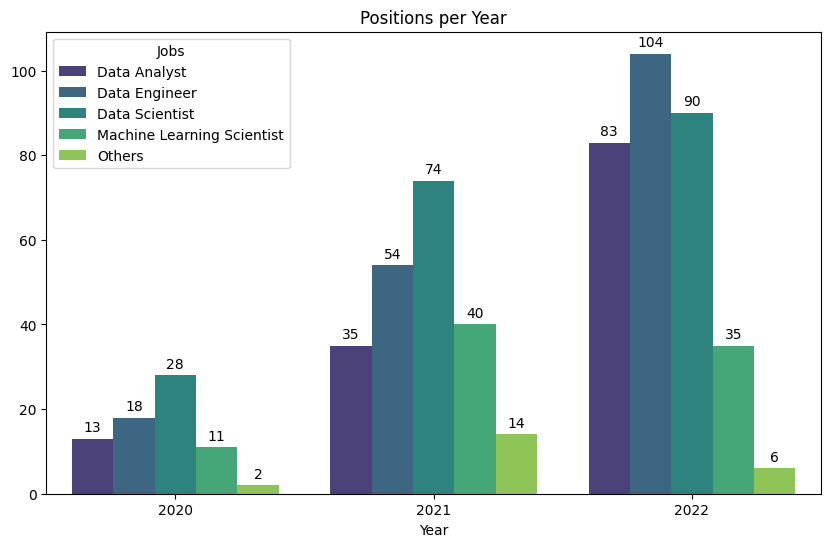

In [111]:

# Contar a quantidade de cada cargo por ano
job_counts = modified_df.groupby(['work_year', 'job_title']).size().reset_index(name='count')

# Criar o gráfico
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=job_counts, x='work_year', y='count', hue='job_title', palette='viridis')

# Edição dos títulos do gráfico
plt.title('Positions per Year')
plt.xlabel('Year')
plt.ylabel('')
plt.legend(title='Jobs')

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom',
                    xytext=(0, 3),  # desloca o texto 5 pontos para cima
                    textcoords='offset points')

plt.show()

No gráfico Positions per Year, é possível notar uma crescente em todos os tipos de cargos cadastrados entre os anos de 2020 até 2022.

Um certo cuidado deve ser tomado com relação ao ano de 2020 principalmente, uma vez que não há informação acerca do momento em que as informações começaram a ser cadastradas, pois não há uma coluna data ou mês no dataset.

Se considerarmos que os cadastros são do ano completo de 2020 e não de parte do ano (p. ex., os cadastros começaram a partir do mês de junho), podemos ver que de 2020 para 2021, houve crescimento, assim com de 2021 para 2022 (a ser averiguado mais a fundo). É importante lembrar que essa época a qual estamos analisando foi a época da pandemia, onde houve um crescimento na área da tecnologia como um todo, sendo esta uma hipótese para os resultados observados.

Outro ponto interessante e que deve ser observado é que os cargos envolvendo machine learning diminuíram de entre os anos de 2021 e 2022. Este é um resultado interessante e até um pouco contraditório, uma vez que o chat-gpt foi lançado em novembro de 2022, sendo este um marco na forma como utilizamos a máquina. Como não há registros para ano de 2023, não é possível verificar se esta tendência se manteve.

Os crescimentos mais expressivos de 2021 para 2022 foram nos cargos de data analyst e data engineer (mostrar em gráficos com %)

Outro ponto que deve-se destacar é que a falta de uma coluna com datas mais precisas acaba compromentendo determinadas análises e acabamos entrando no ramo das hipóteses para (tentar) justificar os resultados.

fazendo o comparativo dos cargos a cada ano, em 2020 e 2021, o cargo com maior número de cadastros foi o de Data Scientist, seguido por Data Engineere e Data Analyst. Já em 2022, o cargo de mais cadastros foi o de Data Engineer, seguido por Data Scientist e Data Analyst. Em todos os anos, o cargo de Machine Learning Scientist foi o que apresentou menos cadastros.

-------

----

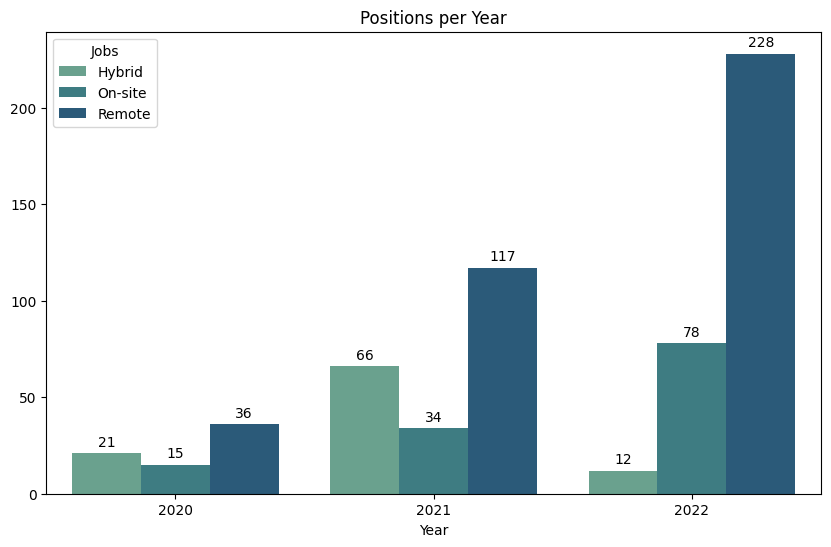

In [112]:
# Contar a quantidade de cada cargo por ano
job_counts = modified_df.groupby(['work_year', 'remote_ratio']).size().reset_index(name='count')

# Criar o gráfico
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=job_counts, x='work_year', y='count', hue='remote_ratio', palette='crest')

# Edição dos títulos do gráfico
plt.title('Positions per Year')
plt.xlabel('Year')
plt.ylabel('')
plt.legend(title='Jobs')

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom',
                    xytext=(0, 3),  # desloca o texto 5 pontos para cima
                    textcoords='offset points')

plt.show()

In [113]:
df['company_location'].value_counts()

,count
company_location,
US,355
GB,47
CA,30
DE,28
IN,24
FR,15
ES,14
GR,11
JP,6


In [114]:
df['company_size'].value_counts()

,count
company_size,
Medium,326
Large,198
Small,83


In [115]:
df['experience_level'].value_counts()

,count
experience_level,
Senior,280
Mid,213
Entry,88
Executive,26


In [116]:
df['work_year'].value_counts()

,count
work_year,
2022,318
2021,217
2020,72


In [117]:
df['employment_type'].value_counts()

,count
employment_type,
Full-time,588
Part-time,10
Contract,5
Freelance,4


OBSERVAÇÕES:

Foi possivel perceber que do top 10 vagas que mais tem profissionais neste dataset os que mais se destacam é os Data Scientist, Data Engineer e Data Analyst.

### Qual o grau de Senioridade dos profissionais de dados?

In [118]:
levels = df.experience_level.value_counts()
levels

,count
experience_level,
Senior,280
Mid,213
Entry,88
Executive,26


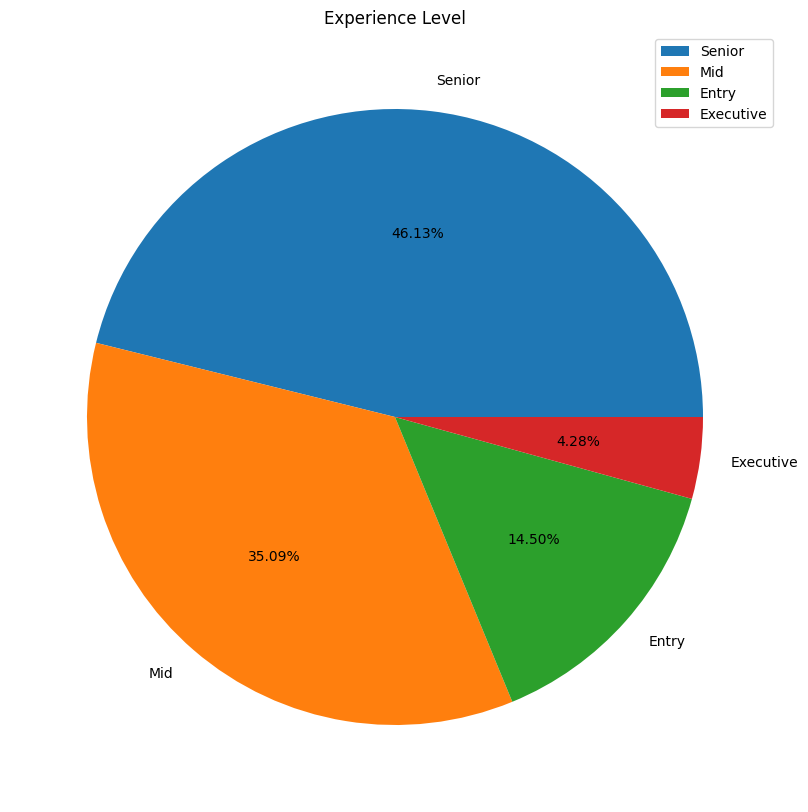

In [119]:
plt.figure(figsize=(15, 10))
plt.pie(x = levels.values,labels =levels.index,autopct='%1.2f%%')
plt.title('Experience Level')
plt.legend()
plt.show()

Observação:

Com a análise desse gráfico se nota uma maior participação de profissionais seniores

In [120]:
# Criando o dicionário de mapeamento
categories = {
    '3D Computer Vision Researcher': 'Other',
    'AI Scientist': 'Scientist',
    'Analytics Engineer': 'Engineer',
    'Applied Data Scientist': 'Scientist',
    'Applied Machine Learning Scientist': 'Scientist',
    'BI Data Analyst': 'Data Analyst',
    'Big Data Architect': 'Architect',
    'Big Data Engineer': 'Engineer',
    'Business Data Analyst': 'Data Analyst',
    'Cloud Data Engineer': 'Engineer',
    'Computer Vision Engineer': 'Engineer',
    'Computer Vision Software Engineer': 'Engineer',
    'Data Analyst': 'Data Analyst',
    'Data Analytics Engineer': 'Engineer',
    'Data Analytics Lead': 'Leadership',
    'Data Analytics Manager': 'Leadership',
    'Data Architect': 'Architect',
    'Data Engineer': 'Engineer',
    'Data Engineering Manager': 'Leadership',
    'Data Science Consultant': 'Consultant',
    'Data Science Engineer': 'Engineer',
    'Data Science Manager': 'Leadership',
    'Data Scientist': 'Scientist',
    'Data Specialist': 'Other',
    'Director of Data Engineering': 'Engineer',
    'Director of Data Science': 'Leadership',
    'ETL Developer': 'Developer',
    'Finance Data Analyst': 'Data Analyst',
    'Financial Data Analyst': 'Data Analyst',
    'Head of Data': 'Leadership',
    'Head of Data Science': 'Leadership',
    'Head of Machine Learning': 'Leadership',
    'Lead Data Analyst': 'Leadership',
    'Lead Data Engineer': 'Leadership',
    'Lead Data Scientist': 'Leadership',
    'Lead Machine Learning Engineer': 'Leadership',
    'Machine Learning Developer': 'Developer',
    'Machine Learning Engineer': 'Engineer',
    'Machine Learning Infrastructure Engineer': 'Engineer',
    'Machine Learning Manager': 'Leadership',
    'Machine Learning Scientist': 'Scientist',
    'Marketing Data Analyst': 'Data Analyst',
    'ML Engineer': 'Engineer',
    'NLP Engineer': 'Engineer',
    'Principal Data Analyst': 'Data Analyst',
    'Principal Data Engineer': 'Engineer',
    'Principal Data Scientist': 'Scientist',
    'Product Data Analyst': 'Data Analyst',
    'Research Scientist': 'Scientist',
    'Staff Data Scientist': 'Scientist'
}

In [121]:
#Adicionando a nova coluna 'categoria' ao DataFrame
df['categories'] = df['job_title'].map(categories).fillna('Outros')

In [122]:
#Agora, o DataFrame 'df' terá uma nova coluna 'categoria' com as subcategorias correspondentes
df

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,anual_salary_brl,monthly_salary_brl,categories
0,2020,Mid,Full-time,Data Scientist,79833,DE,On-site,DE,Large,411938.28,34328.19,Scientist
1,2020,Senior,Full-time,Machine Learning Scientist,260000,JP,On-site,JP,Small,1341600.00,111800.00,Scientist
2,2020,Senior,Full-time,Big Data Engineer,109024,GB,Hybrid,GB,Medium,562563.84,46880.32,Engineer
3,2020,Mid,Full-time,Product Data Analyst,20000,HN,On-site,HN,Small,103200.00,8600.00,Data Analyst
4,2020,Senior,Full-time,Machine Learning Engineer,150000,US,Hybrid,US,Large,774000.00,64500.00,Engineer
...,...,...,...,...,...,...,...,...,...,...,...,...
602,2022,Senior,Full-time,Data Engineer,154000,US,Remote,US,Medium,796180.00,66348.33,Engineer
603,2022,Senior,Full-time,Data Engineer,126000,US,Remote,US,Medium,651420.00,54285.00,Engineer
604,2022,Senior,Full-time,Data Analyst,129000,US,On-site,US,Medium,666930.00,55577.50,Data Analyst
605,2022,Senior,Full-time,Data Analyst,150000,US,Remote,US,Medium,775500.00,64625.00,Data Analyst
